# Основи нейромереж
Класифікація датасету FachionMNIST за допомогою слоів Dense.

---
<a name="0" a/>

### Зміст:

* 1. [Імпорт данних](#1)
* 2. [Первинний аналіз](#2)
* 3. [Побудова нейромережі. На основі Dense шарів.](#3)

Інсталяція бібліотек

In [ ]:
!pip install tensorflow

Імпорт бібліотек

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Input

from sklearn.metrics import confusion_matrix

---
<a name="1" a/>

### 1. Імпорт данних
[зміст](#0)

Завантажуємо данні та одразу розділяємо на `features` та `target`, `train` та `test`.

In [4]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 2s 0us/step


Опис датасету. Розмірність

In [5]:
print('x_train:\t{}' .format(X_train.shape))
print('y_train:\t{}' .format(y_train.shape))
print('x_test:\t\t{}'.format(X_test.shape))
print('y_test:\t\t{}'.format(y_test.shape))

x_train:	(60000, 28, 28)
y_train:	(60000,)
x_test:		(10000, 28, 28)
y_test:		(10000,)


Часткове відображення датасету для розуміння вмісту класифікації

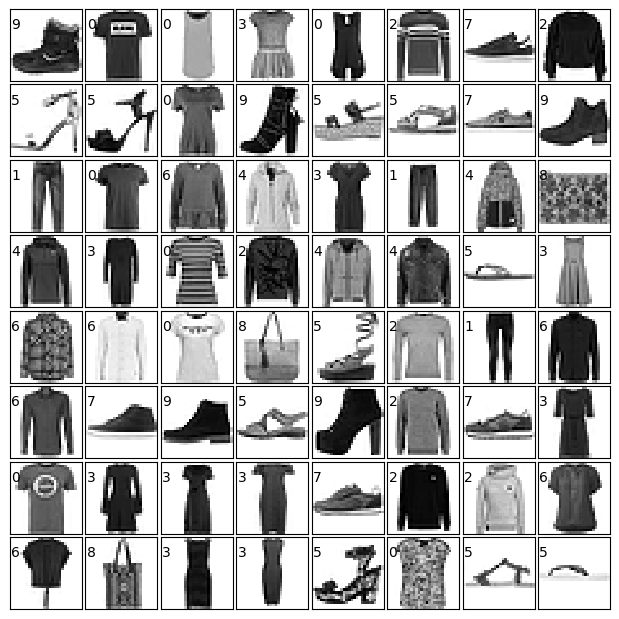

In [6]:
# set up the figure
fig = plt.figure(figsize=(6, 6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 28x28 pixels
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(X_train[i], cmap=plt.cm.binary, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(y_train[i]))

Опис классів:

| Клас | Опис
| --   | --
|0	|Футболка / топ
|1	|Штани
|2	|Пуловер
|3	|Плаття
|4	|Пальто
|5	|Сандалі
|6	|Сорочка
|7	|Кросівки
|8	|Сумка
|9	|Черевики

---
<a name="2" a/>

### 2. Первинний аналіз
[зміст](#0)

Розмір зображень в датасеті 28х28 пікселів. Кольорове відображення - градаціїї сірого зі значенням від 0 до 255.

Перед маштабуванням фіч за віддтінком серого задамо формат данних float16 за для пришвидшеної обробки моделі.

In [7]:
X_train = X_train.astype('float16')
X_test = X_test.astype('float16')

Відмаштабуємо фічі та подивимось на результат

In [8]:
X_train /= 255.
X_test /= 255.

Перевіряємо рандомний приклад

In [9]:
X_train[66][14]

array([0.     , 0.     , 0.     , 0.     , 0.     , 0.00392, 0.     ,
       0.     , 0.753  , 0.8784 , 0.8037 , 0.7686 , 0.7607 , 0.753  ,
       0.741  , 0.718  , 0.7803 , 0.757  , 0.7646 , 0.8    , 0.7803 ,
       0.     , 0.     , 0.00784, 0.     , 0.     , 0.     , 0.     ],
      dtype=float16)

За домогою енкодера перетворимо формат данних target на категоріальний

In [10]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
num_classes = y_test.shape[1]
print(f"Кількість классів: {num_classes}")

Кількість классів: 10


---
<a name="3" a/>

### 3. Побудова нейромережі
[зміст](#0)

Вказуємо гіперпараметри. Кількість тренувальниїх епох та рейт навчання.

In [11]:
epochs = 10
rate = 0.001

Функція створення Dense моделі

In [12]:
def dense_model_create():
    model = Sequential()

    model.add(Input(shape=(28,28)))

    model.add(Flatten())

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(16, activation='relu'))
    model.add(Dropout(0.2))

    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer=Adam(rate), loss='categorical_crossentropy', metrics=['accuracy'])
    return model

Створюємо модель та дивимось на її структуру

In [13]:
model = dense_model_create()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0

Навчаємо

In [14]:
results = model.fit(X_train, y_train, epochs= epochs, batch_size = 64, validation_data = (X_test, y_test), verbose = 2) #

Epoch 1/10
938/938 - 4s - loss: 0.9379 - accuracy: 0.6587 - val_loss: 0.5252 - val_accuracy: 0.8158 - 4s/epoch - 5ms/step
Epoch 2/10
938/938 - 3s - loss: 0.5927 - accuracy: 0.7944 - val_loss: 0.4689 - val_accuracy: 0.8366 - 3s/epoch - 3ms/step
Epoch 3/10
938/938 - 3s - loss: 0.5336 - accuracy: 0.8163 - val_loss: 0.4353 - val_accuracy: 0.8432 - 3s/epoch - 3ms/step
Epoch 4/10
938/938 - 3s - loss: 0.4937 - accuracy: 0.8321 - val_loss: 0.4237 - val_accuracy: 0.8496 - 3s/epoch - 3ms/step
Epoch 5/10
938/938 - 3s - loss: 0.4796 - accuracy: 0.8365 - val_loss: 0.4114 - val_accuracy: 0.8562 - 3s/epoch - 3ms/step
Epoch 6/10
938/938 - 3s - loss: 0.4603 - accuracy: 0.8420 - val_loss: 0.4040 - val_accuracy: 0.8565 - 3s/epoch - 3ms/step
Epoch 7/10
938/938 - 3s - loss: 0.4450 - accuracy: 0.8480 - val_loss: 0.4008 - val_accuracy: 0.8614 - 3s/epoch - 3ms/step
Epoch 8/10
938/938 - 3s - loss: 0.4363 - accuracy: 0.8503 - val_loss: 0.3888 - val_accuracy: 0.8637 - 3s/epoch - 3ms/step
Epoch 9/10
938/938 - 3s 

Отримання predict

In [15]:
prediction_values = model.predict(X_test)
classes_x=np.argmax(prediction_values,axis=1)

313/313 [==============================] - 1s 2ms/step


Метрики

In [16]:
print("Оцінка на train данних:")
(loss, accuracy) = model.evaluate(X_train,y_train, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))


print("Оцінка на test данних:")
(loss, accuracy) = model.evaluate(X_test, y_test, verbose=0)
print("loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

Оцінка на train данних:
loss=0.3082, accuracy: 88.7317%
Оцінка на test данних:
loss=0.3825, accuracy: 87.1500%


Побудова графіку навчання. Залежності accurasy та loss від епохи.

Maximum Loss : 0.9379
Minimum Loss : 0.4180
Loss difference : 0.5199


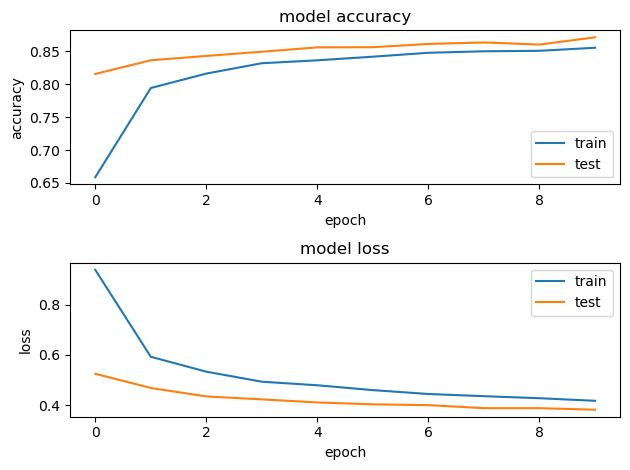

In [17]:
# summarize history for accuracy
plt.subplot(211)
plt.plot(results.history['accuracy'])
plt.plot(results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])

# summarize history for loss
plt.subplot(212)
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.tight_layout()

max_loss = np.max(results.history['loss'])
min_loss = np.min(results.history['loss'])
print("Maximum Loss : {:.4f}".format(max_loss))
print("Minimum Loss : {:.4f}".format(min_loss))
print("Loss difference : {:.4f}".format((max_loss - min_loss)))

На графіку бачимо як accuracy на навчальних данних швидко зростає вже на першій епосі, з 2 епохи сповільнює зріст і виходить майже на плато. Loss симетрично зменьшується на першій епосі і вповільнює зменшення виходить на плато.

# Confusion matrix

Text(0.5, 23.52222222222222, 'Predicted')

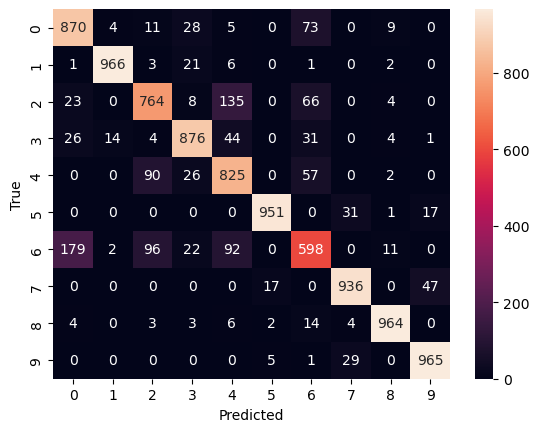

In [18]:
Y_true = np.argmax(y_test,axis = 1)
confusion_mtx = confusion_matrix(Y_true, classes_x)
sns.heatmap(confusion_mtx, annot=True, fmt="d")
plt.ylabel('True')
plt.xlabel('Predicted')

Бачимо як класи добре коррелюють самі з собою коли не коррелюють з іншими. Як бачимо клас `Пальто` корелює з `Пуловером`, а `Сорочка` з `Пулловером` та `Штанями`. Я ще розумію як можуть коррелювати `Пальто`, `Сорочка` і `Пуллловер`, зранку без окулярів і сам не розберусь але `Штані`....))

Приклади класифікації

313/313 [==============================] - 1s 2ms/step


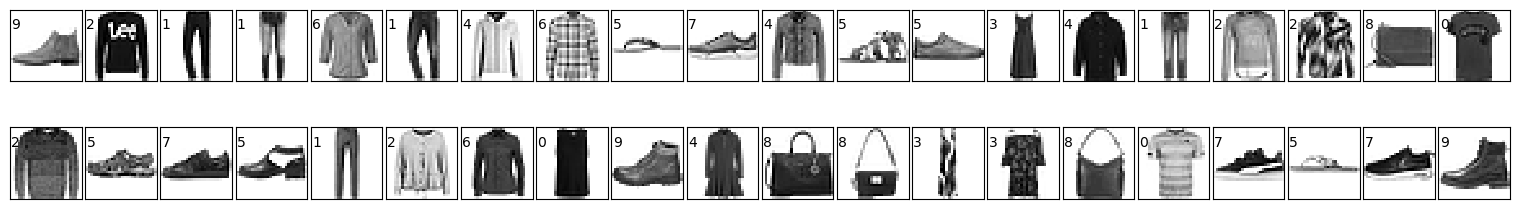

In [19]:
prediction_values = model.predict(X_test)


# set up the figure
fig = plt.figure(figsize=(15, 7))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# plot the digits: each image is 8x8 pixels
for i in range(40):
    ax = fig.add_subplot(6, 20, i + 1, xticks=[], yticks=[])
    ax.imshow(X_test[i,:].reshape((28,28)),cmap=plt.cm.gray_r, interpolation='nearest')

    # label the image with the target value
    ax.text(0, 7, str(classes_x[i]))

Продублюю опис класів:

| Клас | Опис
| --   | --
|0	|Футболка / топ
|1	|Штани
|2	|Пуловер
|3	|Плаття
|4	|Пальто
|5	|Сандалі
|6	|Сорочка
|7	|Кросівки
|8	|Сумка
|9	|Черевики

Загалом є декілька помилок, але нейромережа добре виконує класифікацію, accuracy > 85%

### Дякую за увагу =)